In [2]:
# Imports
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from scipy.stats import distributions as pdf
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sklearn.datasets as dset

In [127]:
# helper functions
def make_data(num_samples, scatter):
    np.random.seed(123)
    class_means =[(1,1),(1,8),(7,1)]
    c1_samples =np.random.multivariate_normal(mean=class_means[0], 
                                             cov=[[scatter[0] *1, 0], [0, scatter[0] *1]], 
                                            size=num_samples[0])
    c2_samples = np.random.multivariate_normal(mean=class_means[1], 
                                            cov=[[scatter[1] *1, 0], [0, scatter[1] *1]], 
                                            size=num_samples[1])
    c3_samples = np.random.multivariate_normal(mean=class_means[2], 
                                            cov=[[scatter[2] *1, 0], [0, scatter[2] *1]], 
                                            size=num_samples[2])
    
    # labels
    c1_labels = np.vstack((np.ones(c1_samples.shape[0]), 
                           np.zeros(c1_samples.shape[0]), 
                           np.zeros(c1_samples.shape[0]))).T
    c2_labels = np.vstack((np.zeros(c2_samples.shape[0]), 
                           np.ones(c2_samples.shape[0]), 
                           np.zeros(c2_samples.shape[0]))).T
    c3_labels = np.vstack((np.zeros(c3_samples.shape[0]), 
                           np.zeros(c3_samples.shape[0]), 
                           np.ones(c3_samples.shape[0]))).T
    
    
    # feature matrix, weight matrix, label matrix (one-hot)
    x = np.vstack((c1_samples, c2_samples, c3_samples))
#     x = np.hstack((np.ones(x.shape[0])[:,None],x)) # bias term
    labels = np.vstack((c1_labels, c2_labels, c3_labels))
    
    return x, labels, (c1_samples, c2_samples, c3_samples)

def plot_data(c1_samples,c2_samples,c3_samples):
    ax = plt.subplot()
    ax.scatter(c1_samples[:,0],c1_samples[:,1])
    ax.scatter(c2_samples[:,0],c2_samples[:,1])
    ax.scatter(c3_samples[:,0],c3_samples[:,1])
    return ax


def loss_fn(x,weights,labels):    
    # scores
    s = x@weights.T  # scores
    eps = np.max(s)  # constant for numerical stability
    probs = (np.exp(s-eps))/ (np.sum(np.exp(s-eps), axis=1))[:,None]
    # Loss function (negative log-likelihood)
    loss = np.sum(-labels*np.log(probs+1e-6))
    dloss_dw = (probs-labels).T@x
    return loss, dloss_dw, probs


def probability(x,weights):
    s = x@weights.T  # scores
    eps = np.max(s)  # constant for numerical stability
    probs = (np.exp(s-eps))/ (np.sum(np.exp(s-eps), axis=1))[:,None]
    return probs


def grid(x,w, mode='sep'):
    grid_resolution = 100
    grid_x = np.linspace(np.min(x[:,1]),np.max(x[:,1]),grid_resolution)
    grid_y = np.linspace(np.min(x[:,2]),np.max(x[:,2]),grid_resolution)

    grid = np.zeros((grid_resolution,grid_resolution))
    for i, ig in enumerate(grid_x):
        for j, jg in enumerate(grid_y):
            feats = np.array((1,ig,jg))[:,None].T
            pr=probability(feats,w)
            if mode == 'sep':
                grid[i,j]=np.argmax(pr)
            elif mode == 'probs':
                grid[i,j]=np.max(pr)
    return grid_x, grid_y, grid
  

def plot_decision_boundary(ax1, u, v, z, levels=None, colors=['k','k','k']):
    # Basic contour plot
#     fig1, ax1 = plt.subplots()
    if levels == None:
        ctp = ax1.contour(u, v, z, alpha=0.6)
    else:
        ctp = ax1.contour(u, v, z, levels=levels, colors=colors, alpha=0.6)
        # Description of contours
        fmt = {l: str(l) for l in ctp.levels}
        ax1.clabel(ctp, ctp.levels, inline=True, fmt=fmt, fontsize=10)
        ctp = ax1.contourf(u, v, z, levels=levels, cmap='Greens', alpha=0.3)
    return ax1

In [128]:

x, labels, samples = make_data((20, 20, 20),
                               (1, 1, 1))
w = 0.001 * np.ones((3,x.shape[1])) # #classes x features

for epoch in range(10000):
    
        loss, dw, probs = loss_fn(x,w,labels)
        acc = np.sum(np.argmax(labels)==np.argmax(probs))
        w -= 0.01*dw

        
u,v,z = grid(x,w,mode='sep')
acc = np.sum(np.argmax(labels, axis=1)==np.argmax(probs, axis=1))
acc /= x.shape[0]



ax = plot_data(*samples)

# Plot missclassified data
if acc != 1.0:
    idx = np.argmax(labels, axis=1)!=np.argmax(probs, axis=1)
    ax.scatter(x[idx,1], x[idx,2], marker='x', c='k')


try: 
    ax.text(9,10,'loss: {0:.4f}'.format(loss))
    ax.text(9,11,'acc: {0:.4f}'.format(acc)) 
except:
    pass
z = z.T
ax = plot_decision_boundary(ax, u,v,z, levels=[0,0.9,1.1,2])
plt.xlim(-4,14)
plt.ylim(-4,14)
#     return ax


IndexError: index 2 is out of bounds for axis 1 with size 2

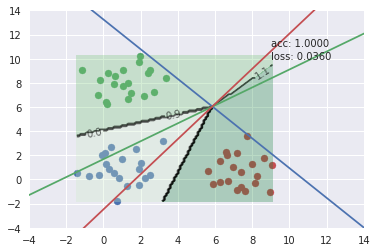

In [125]:
x1= np.linspace(-5,15,200)
ax.plot(x1,-(w[0,1]*x1+w[0,0])/w[0,2])
ax.plot(x1,-(w[1,1]*x1+w[1,0])/w[1,2])
ax.plot(x1,-(w[2,1]*x1+w[2,0])/w[2,2])
ax.figure

In [7]:
g = np.zeros((3,3))
for i ,ix in enumerate(x):
    for j, jy in enumerate(y):
        g[i,j] = ix * jy
        

In [30]:
g.T

array([[0., 0., 0.],
       [0., 1., 2.],
       [0., 2., 4.]])

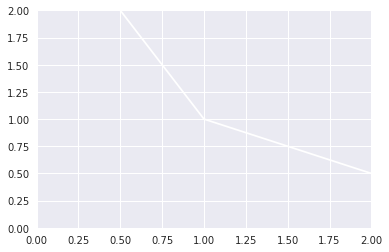

In [32]:
plt.contour(x,y,a, levels=[1])

In [129]:
x.shape

(60, 2)

In [130]:

x, labels, samples = make_data((20, 20, 20),
                               (1, 1, 1))
w = 0.001 * np.ones((3,x.shape[1])) # #classes x features

for epoch in range(10000):
    
        loss, dw, probs = loss_fn(x,w,labels)
        acc = np.sum(np.argmax(labels)==np.argmax(probs))
        w -= 0.01*dw

        
u1,v1,z1 = grid(x,w,mode='sep')
u2,v2,z2 = grid(x,w,mode='probs')
acc = np.sum(np.argmax(labels, axis=1)==np.argmax(probs, axis=1))
acc /= x.shape[0]



ax = plot_data(*samples)

# Plot missclassified data
if acc != 1.0:
    idx = np.argmax(labels, axis=1)!=np.argmax(probs, axis=1)
    ax.scatter(x[idx,1], x[idx,2], marker='x', c='k')


try: 
    ax.text(9,10,'loss: {0:.4f}'.format(loss))
    ax.text(9,11,'acc: {0:.4f}'.format(acc)) 
except:
    pass

ax = plot_decision_boundary(ax, u1,v1,z1.T,)
ax = plot_decision_boundary(ax, u2,v2,z2.T,)
plt.xlim(-4,14)
plt.ylim(-4,14)
#     return ax


IndexError: index 2 is out of bounds for axis 1 with size 2

training score : 1.000 (multinomial)


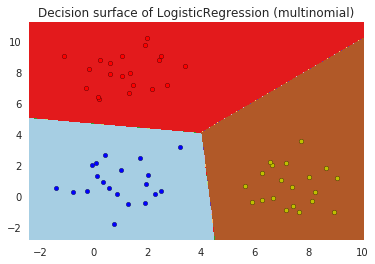

In [149]:

from sklearn.linear_model import LogisticRegression


for multi_class in (['multinomial']):
    clf = LogisticRegression(solver='sag', max_iter=1000, random_state=42,
                             multi_class=multi_class).fit(x, np.argmax(labels, axis=1))

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(x, np.argmax(labels, axis=1)), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(np.argmax(labels, axis=1) == i)
        plt.scatter(x[idx, 0], x[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

#     # Plot the three one-against-all classifiers
#     xmin, xmax = plt.xlim()
#     ymin, ymax = plt.ylim()
#     coef = clf.coef_
#     intercept = clf.intercept_

#     def plot_hyperplane(c, color):
#         def line(x0):
#             return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
#         plt.plot([xmin, xmax], [line(xmin), line(xmax)],
#                  ls="--", color=color)

#     for i, color in zip(clf.classes_, colors):
#         plot_hyperplane(i, color)

plt.show()

In [139]:
np.argmax(labels, axis=1).shape

(60,)

In [144]:
Z.shape

(702, 626)